# Fabler av Tor Åge Bringsværd

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import pandas as pd
import dhlab.graph_networkx_louvain as gnl
mu.css()

In [326]:
mu.code_toggle()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Egennavn \n"
    navn += ', '.join(categories['propr'])
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += ', '.join(Grouping[cat]) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

Henter alle bøkene - viser de øverste treffene

In [4]:
blind=nb.book_corpus(title='blindpassasjer%')
blind

,urn,author,title,year
0,2013020609508,"Bing, Jon",Blindpassasjer,2011
1,2014051405009,"Bye, Harald",Blindpassasjeren,2011
2,2009031104031,"Bjorvatn, Asle Eivind",Blindpassasjeren,2000
3,2013031906094,"Marey, Helen",Blindpassasjeren,1967
4,2012072505024,"Skulstad, Terje",Blindpassasjer,1978
5,2010112208124,"Morgan, Diana",Blindpassasjeren,1991
6,2015072108373,"Wentworth, Sally",Blindpassasjeren,1994
7,2012083008067,,Blindpassasjer,2011
8,2011011106023,"Vatsend, Helge",Blindpassasjerer,1967


In [5]:
blindpassasjer = 2013020609508

In [6]:
nb.metadata(2013020609508)

[[2013020609508,
  'Bing, Jon',
  2011,
  'Blindpassasjer',
  'et science fiction-drama i tre episoder',
  '[Teatret vårt]',
  'drama',
  'fb8914937ed14c0667ec024bce17781d',
  'nob',
  '']]

In [176]:
bring = nb.book_corpus(author = 'Bringsværd%tor%', limit = 400, lang='nob')
len(bring)

209

In [177]:
bingogbring = nb.get_urns_from_text("bingogbring.txt")

In [178]:
bingogbring

['2008091800087',
 '2016112948616',
 '2007052404019',
 '2013012407050',
 '2007081001008',
 '2013032008066',
 '2017071007088',
 '2014013008048',
 '2007081601091',
 '2007042704001',
 '2012070405121',
 '2014021807077',
 '2007051404015',
 '2011102508233',
 '2017062648086',
 '2018102307055',
 '2007051504006',
 '2007053001031',
 '2011070506082',
 '2017070307015',
 '2007070300023',
 '2012021508140',
 '2013071208214',
 '2011061509044',
 '2011061509045',
 '2007043000003',
 '2007082300054',
 '2014030308417',
 '2013013108024',
 '2010111508041',
 '2017112048036',
 '2013072208044',
 '2012120606068',
 '2014012108095',
 '2013052706059',
 '2014021006077',
 '8979123367722',
 '2008100800012',
 '2013020609508',
 '2009061904054',
 '2011062405053',
 '2009011204044',
 '2011040508073',
 '2014101408117',
 '2007081501084',
 '2008120100067',
 '2009042104014',
 '2008092604048',
 '2013041805116',
 '2008120301012',
 '2008102204077',
 '2008100800013',
 '2013030505054',
 '2009042004146',
 '2013120906089',
 '20111004

Lager ramme av bing og bring

In [206]:
bingbring = nb.frame(nb.metadata(bingogbring), 'urn author year title subtitle publisher genre'.split())

In [207]:
bingbring.urn = bingbring.urn.map(str)

In [208]:
bingbring

,urn,author,year,title,subtitle,publisher,genre,7,8,9
0,2008091800087,"Bringsværd, Tor Åge",1999,TÅB - Tor Åge Bringsværd,sitater,Gyldendal Tiden,fiction,a0b5ec16a3e22e75b0876dadcd5df792,nob,
1,2007052404019,,1967,Og jorden skal beve,12 noveller om ett tema : en science fiction-a...,Gyldendal,fiction,a4bf409fb0746ea767c545d0357ed887,nob,
2,2013012407050,"Bing, Jon",1980,Marco Polos nye eventyr,,Gyldendal,fiction,cad618043dbbe01a49cec2c76dbba603,nob,
3,2007081001008,"Bing, Jon",1991,Tvilstilfeller,,Pax,fiction,086f39b541d50bad6b7b90c9025a360a,nob,
4,2013032008066,,1977,Dragsug,en science fiction-antologi,Gyldendal,fiction,67b5b05fb1a3fdfff105a7f94aea01c3,nob,
5,2014013008048,,1976,Åndeskrift,en science fiction-antologi,Gyldendal,fiction,1cf612f0a81cde2471f17e9941012062,nob,
6,2007081601091,"Bing, Jon",1990,Av støv er du kommet,skuespill,Pax,fiction,1a603ad99dae967f82d0eb60db7778a8,nob,
7,2007042704001,"Bing, Jon",1967,Rundt solen i ring,,Gyldendal,fiction,cb7a1e59a98506cb22c58730c3a5ee5c,nob,
8,2012070405121,,1980,Stjerneskudd,en science fiction-antologi,Gyldendal,fiction,6fef7182c744140b98360313dfe07de7,nob,
9,2014021807077,,1976,Gale professor,en science fiction-antologi,Gyldendal,fiction,8e0ad35293934a27a8ba293f0600b0ec,nob,


Henter ut Bings arbeider

In [209]:
bing = nb.book_corpus(author="bing,%jon%", limit=500, lang='nob')

In [210]:
bing.urn = bing.urn.map(str)

In [211]:
bing_urns = (list(set(bing.urn) - set(bingbring.urn)))

bing = nb.frame(nb.metadata(bing_urns), 'urn author year title subtitle publisher genre'.split())

bing.urn = bing.urn.map(str)

In [212]:
bing

,urn,author,year,title,subtitle,publisher,genre,7,8,9
0,2012091705018,"Bing, Jon",1987,"Journalister, aviser og databaser",,Universitetsforlaget,unknown,d4f5ddf9ed00caa7a20f53ab0d30f8c0,nob,
1,2013012407051,"Bing, Jon",1976,Det myke landskapet,,Gyldendal,unknown,b82ba3345db8feaebf1c59917de170c5,nob,
2,2012070608160,"Bing, Jon",1988,Database for offentlige publikasjoner (DOP),fremtidig organisering,"Universitetet i Oslo, Institutt for rettsinfor...",unknown,513d28503f45712cb6b79941556d4ef9,nob,
3,2014101508128,"Bing, Jon",1994,Offentlige informasjonstjenester,rettslige aspekter,TANO,notfiction,5b686b97933c4859c76b7d5bd055564b,nob,
4,2008061800072,"Bing, Jon",1972,Litteratur,science fiction ; forsøkstekst,Forsøksrådet for skoleverket og Gyldendal,unknown,dae7e4a57f07f6ccc641c266ce78da05,nob,
5,2010071508206,"Bing, Jon",1996,Elektronisk publisering,utvalgte rettslige aspekter,Tano-Aschehoug,notfiction,060a537eefc5e1a69f54c11726db83eb,nob,
6,2007080200002,"Bing, Jon",1969,Lunarium,boken om månen,Gyldendal,notfiction,1bf7ee88b66c04c1783c915af0f8e617,nob,
7,2012091705022,"Bing, Jon",1987,Strafferettslig vern av immaterielle goder,,Universitetsforlaget,unknown,48f366c2551b0267e6a52a3139856885,nob,
8,2016032908090,"Bing, Jon",1992,Standardiserte formidlingskanaler,juridiske aspekter ved etablering og distribus...,Statskonsult,,91077738f0abaf9a8c557749acc452ee,nob,
9,2007072300092,"Bing, Jon",1970,Det myke landskapet,,Gyldendal,fiction,7085ef128964cae633b4d2259a248ef3,nob,


# Det kan være overlapp

Sjekk ut overlapp - felles bøker er i listen bingbring, som er hentet fra nb.no, som kan trekkes fra bing og bring henholdsvis.

In [239]:
bring = nb.book_corpus(author = "bringsværd,%tor%", limit=  500, lang='nob')

In [240]:
bring.urn = bring.urn.map(str)

In [241]:
len(bring.urn)

209

In [242]:
bring_urns = (list(set(bring.urn) - set(bingbring.urn)))

bring = nb.frame(nb.metadata(bring_urns), 'urn author year title subtitle publisher genre'.split())

bring.urn = bring.urn.map(str)

In [243]:
bring

,urn,author,year,title,subtitle,publisher,genre,7,8,9
0,2014022006087,"Bringsværd, Tor Åge",1989,himmelske stresskoffert,,Solum,drama,fc3acf8be3057de02af0546102fa89b9,nob,
1,2012072505035,"Bringsværd, Tor Åge",1980,Minotauros,,Gyldendal,fiction,fea7831922330dbe789d15912f60472d,nob,
2,2008092900055,"Bringsværd, Tor Åge",1999,Det blå folket,,Gyldendal Tiden,fiction,de8ed9d2fdc8ac771e0d30a80afd6753,nob,
3,2015102208120,"Bringsværd, Tor Åge",2001,Petra får en hund,,Cappelen,fiction,691599ecaefd0defaeb006376bd35728,nob,
4,2016070748044,"Bringsværd, Tor Åge",2001,Karsten hjelper pappa,,Cappelen,fiction,5b91cd54de76e4794f47285cf67d9426,nob,
5,2016021807523,"Bringsværd, Tor Åge",2006,Jørgen Moes vei nr. 13,,Gyldendal,short story,62fe484819c8efdea9be15b14af67076,nob,
6,2008100804064,"Bringsværd, Tor Åge",1999,Beowulf,han som ville bli husket,Gyldendal Tiden,fiction,5dc6d6c99e0b8cc9639b1fb1c52707e2,nob,
7,2014051505046,"Bringsværd, Tor Åge",2007,Karsten og Petra i Tivoli,på eventyr i København,Cappelen,novel,8343309ed8186c1e7b5d5e5a189b82d0,nob,
8,2011100608036,"Bringsværd, Tor Åge",2004,Håndbok i kartozoologi,,Tibe Oslo,notfiction,f310bef8bfd4f476b4950d436ed13149,nob,
9,2013012506019,"Bringsværd, Tor Åge",2009,Kokos og vennene hans,let og finn,Cappelen Damm,short story,e2ef22cbd5113ae261970596cb53e21f,nob,


Så nå har vi Bings, Bringsværds og Bing og Bringsværd

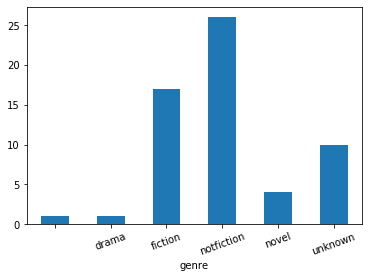

In [244]:
bing_genre = bing.groupby('genre').count()['urn']

bing_genre.plot(kind='bar', rot=20)

In [318]:
bing[bing.genre=='notfiction']

,urn,author,year,title,subtitle,publisher,genre,7,8,9
3,2014101508128,"Bing, Jon",1994,Offentlige informasjonstjenester,rettslige aspekter,TANO,notfiction,5b686b97933c4859c76b7d5bd055564b,nob,
5,2010071508206,"Bing, Jon",1996,Elektronisk publisering,utvalgte rettslige aspekter,Tano-Aschehoug,notfiction,060a537eefc5e1a69f54c11726db83eb,nob,
6,2007080200002,"Bing, Jon",1969,Lunarium,boken om månen,Gyldendal,notfiction,1bf7ee88b66c04c1783c915af0f8e617,nob,
10,2008092300088,"Bing, Jon",1998,Landskap med tegn,en liten bok om informasjonsteknologi og infor...,Pax,notfiction,89e9526105331114f206e94d0a508626,nob,
11,2010080208082,"Bing, Jon",1997,Rettslige aspekter ved digital kringkasting,,Tano-Aschehoug,notfiction,5cd5915c32997bc79cec8563fc4dba97,nob,
12,2007071100100,"Bing, Jon",1984,Boken er død! Leve boken!,og andre essay om informasjonspolitikk,Universitetsforlaget,notfiction,2de4dfb067be8da0bf15906cd2d74424,nob,
14,2012070405000,"Bing, Jon",1975,Forlagsavtalen,,Universitetsforl.,notfiction,b6c1094be9417f7cd6067114507b068a,nob,
15,2013080606033,"Bing, Jon",1982,Utfordringen,"en bok om edb, individ og samfunn : bokmål",Gyldendal,notfiction,7475e64e7dffab06c94847a7fb0114d7,nob,
16,2008061004076,"Bing, Jon",1989,Rettslig informasjonssøking,fra Lovsamlingen til Lovdata,TANO,notfiction,5eeab754e6db6426b7f85a8707f1bff9,nob,
17,2012070608129,"Bing, Jon",1987,Publisering av rettsavgjørelser,,Universitetsforlaget,notfiction,e61a6b7a5703b22abae0571dd406a3e2,nob,


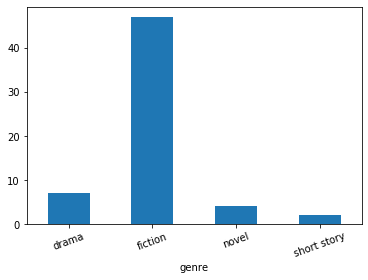

In [246]:
bingbring_genre = bingbring.groupby('genre').count()['urn']

bingbring_genre.plot(kind='bar', rot=20)

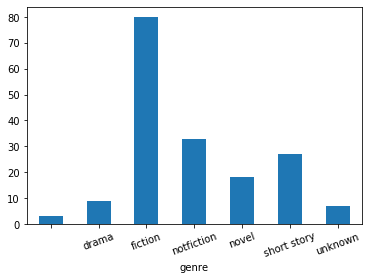

In [247]:
bring_genre = bring.groupby('genre').count()['urn']

bring_genre.plot(kind='bar', rot=20)

In [248]:
bring[bring.genre=='unknown']

,urn,author,year,title,subtitle,publisher,genre,7,8,9
52,2012062905079,"Bringsværd, Tor Åge",1989,Gobi,djevelens skinn og ben : den tredje av flere b...,Gyldendal,unknown,0cf6f3b97dfd11e5fff285ef38ebe0a2,nob,
72,2007080601118,"Bringsværd, Tor Åge",1985,Gobi,barndommens måne,Gyldendal,unknown,afd211ece0cc8dead1a3427f1242aecd,nob,
88,2007080304025,"Bringsværd, Tor Åge",1970,Bazar,,Gyldendal,unknown,c3a23edfb87bcc306c82783896a0ab3d,nob,
93,2010051212003,"Bringsværd, Tor Åge",1999,Karsten og Petras trøstebok,,Cappelen,unknown,1cd143489c7cb9ac8d98c8ee08bdc110,nob,
97,2012022908020,"Bringsværd, Tor Åge",1976,Apachepikene farer frem over sletten ; Blondt ...,,Den norske bokklubben,unknown,dcbc4feab0f0e6ef7da5ccfccf4f907e,nob,
104,2008010204019,"Bringsværd, Tor Åge",1993,I og for seg,,Cappelen,unknown,a9cc089220f2482afbc8bd698f93afad,nob,
169,2007082100035,"Bringsværd, Tor Åge",1991,Det eventyrlige,,Cappelen,unknown,6b167405699ce20ad79c0c667b4e4f62,nob,


In [249]:
bring[bring.title == 'Ruffen']

,urn,author,year,title,subtitle,publisher,genre,7,8,9
115,2014071706049,"Bringsværd, Tor Åge",1972,Ruffen,sjøormen som ikke kunne svømme,Bokklubbens barn,fiction,79b2bea82b2096e79439d0c6531e59f2,nob,
176,2016090648026,"Bringsværd, Tor Åge",2005,Ruffen,sjøormen som ikke kunne svømme,Gyldendal,fiction,ddc812d0f6cfa30318c45bcbcd5bb6ae,nob,


## Samler opp det som er klassifisert som fiksjon hos de tre

In [250]:
bringfiction = nb.aggregate_urns(nb.pure_urn(bring[bring.genre=='fiction']))

In [251]:
bingfiction = nb.aggregate_urns(nb.pure_urn(bing[bing.genre=='fiction']))

In [252]:
bingbringfiction = nb.aggregate_urns(nb.pure_urn(bingbring[bingbring.genre=='fiction']))

## Hva er forskjellen mellom dem?

In [253]:
trekløver = pd.concat([nb.frame(bringfiction, 'Bringsværd'), nb.frame(bingfiction, 'Bing'), nb.frame(bingbringfiction, "Bing og Bringsværd")], axis=1,  sort=False)

In [328]:
trekløver.sort_values(by='Bringsværd', ascending=False)[:10].style.background_gradient(cmap='Blues')

,Bringsværd,Bing,Bing og Bringsværd,tot
.,86735,45803,244847,1.26572e+09
",",27309,32274,112276,1.1053e+09
og,22498,18401,82695,5.43432e+08
er,15934,5304,47797,2.48765e+08
det,15256,12286,55913,2.73412e+08
i,14558,15009,54653,4.60246e+08
en,13520,12501,47885,2.31632e+08
som,13018,11852,43704,2.65145e+08
jeg,11829,3288,36905,7.89334e+07
å,10869,7294,36933,1.84202e+08


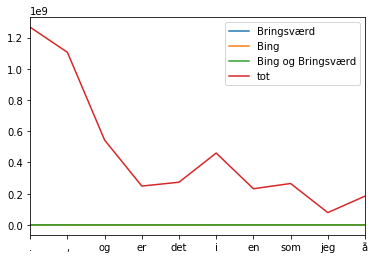

In [329]:
trekløver.sort_values(by='Bringsværd', ascending=False)[:10].plot()

In [255]:
trekløver.sort_values(by='Bing', ascending=False)[:10].style.background_gradient(cmap='Blues')

,Bringsværd,Bing,Bing og Bringsværd
.,86735,45803,244847
",",27309,32274,112276
og,22498,18401,82695
?,7297,16230,36795
i,14558,15009,54653
var,7507,13398,29613
en,13520,12501,47885
det,15256,12286,55913
av,9312,12197,34192
som,13018,11852,43704


### Er Bringsværd presens og Bing fortid?

In [256]:
trekløver.loc[['er','var']].sort_values(by='Bringsværd', ascending=False)[:10].style.background_gradient(cmap='Blues')

,Bringsværd,Bing,Bing og Bringsværd
er,15934,5304,47797
var,7507,13398,29613


In [257]:
trekløver.loc[['blir','ble']].sort_values(by='Bringsværd', ascending=False)[:10].style.background_gradient(cmap='Blues')

,Bringsværd,Bing,Bing og Bringsværd
ble,1855,3081,7203
blir,1195,459,3161


In [258]:
trekløver.loc[['spiste','spiser']].sort_values(by='Bringsværd', ascending=False)[:10].style.background_gradient(cmap='Blues')

,Bringsværd,Bing,Bing og Bringsværd
spiser,127,19,191
spiste,67,95,238


In [320]:
trekløver.loc[['dreper','drepte']].sort_values(by='Bringsværd', ascending=False)[:10].style.background_gradient(cmap='Blues')

,Bringsværd,Bing,Bing og Bringsværd,tot
dreper,97,8,137,147835
drepte,45,31,152,323242


In [321]:
trekløver.loc[['gikk','går']].sort_values(by='Bringsværd', ascending=False)[:10].style.background_gradient(cmap='Blues')

,Bringsværd,Bing,Bing og Bringsværd,tot
går,1044,261,2859,1.08798e+07
gikk,748,1137,3456,1.39513e+07


In [260]:
def compare(df, col1, col2, exp=1):
    return nb.frame((df[df.columns[col1]]**exp/df[[df.columns[col2], df.columns[col1]]].sum(axis=1)).sort_values(ascending=False))

In [307]:
tot =pd.Series(nb.totals(50000))

In [308]:
trekløver['tot'] = tot

In [261]:
compare(trekløver, 1 , 2, 1.02)

,0
Benji,1.152000
Gyvel,1.141167
Kayab,1.136784
Sebastiano,1.129963
Mol,1.127135
Skare,1.124994
Tanz,1.120000
Gnist,1.117975
Torhjelm,1.115753
McCartney,1.115376


# Forskjell Bing mot Bing og Bringsværd

In [266]:
mdprint(compare(trekløver, 1 , 2, 1.02)[:200], cutoff=0)

## Egennavn 
Benji, Gyvel, Kayab, Sebastiano, Mol, Skare, Tanz, Gnist, Torhjelm, McCartney, Sari, Gorm, Miromurr, Mizt, Zalt, Rosenvy, TANZ, Kurle, Floyd, Mure, Shhoho, Hhvuhu, Trane, Amund, Foxtrot, Annan, Michelle, Pink, Teodor, Emilie, Letti, Riitta, Roos, Bjo, Marduk, Tomaso, Bladh, Freddo, Tulla, Sentralinstituttet, Pernille, Alperu, Blake, Mjelle, Jarle, Potentilla, Marek, Mitsi, Elmshorn, Vittorio, Mari, Will, Clodomiro, Cro, Duncan, ", Cisco, Benjis, Svingel, Glo, Muan, Tervor, Sparafucile, Ragg, Capriccoso, Forza, Ettore, Grambol, Environment, Laurent, Barb, Strandland, Flod, Piaga, Enghumleby, Rosenvys, Corneto, Egger, Molto, Miroslav, Spumé, Mami, Con, Lava, LeFarge, CODEX, Absalom, Kitsch, Aluoia, Chen, Marius, Aron, Ercole, Fjellmo, Mario, Mlle, Nick, Tigullio, Zpinagra, Can-Can, Flaggerkatten, Starkey, Bibliotekarene, Teodosio, Biffi, Fiaba, Tanz-systemet, Pelagias, Alexandrias, Balze, OECD, Geum, Larghetto, Calypso, Liz, Logos, Algrezza, Burla, Sebastianos, Roberta, Bartolomeo, Gorzkowski, INFOMAX, Nippurs, Sebastiano., Kanna, Gyvels, Krantz, Sarabande, McKenzie, Blom, Bajazzo, Tammo, Porto, Reel, Rossore, Bølge, Torhjelms, Strip, Cartwright, Parcival, Slirekne, Malida, Armans, Yaxkin, Oostende, Mama, Forse, Santo, Cuca, Zac, CANCER, Fran, Seeman, Astor, TVX, Veronika, Stefano, Kanskjevik, Ummo

## subst
bibliotekarene, bibliotekarer, ferskvann, datateknologien, posørene, styrmennene, forskrift, foretak, bestefaren, luftputefartøyet, romdraktene, helikoptrene, helikoptre
## unknown
dampslottet, dampherrene, skyggevesenene, ser-Marna, himmelsyklene, vixene, dampherren, forsianerne, flaggerkatt, kystfolket, flaggerkatten, vixenes, alunerne, leksikonmodulen, umminittene, sivianerne, dadi, ungdomsroman, bibliotekarenes, übjørn, kriminalsjefen, rakettflyet, loioui, dampdømme, direkt, dampdømmet
## adj
formete


In [383]:
mdprint(compare(trekløver, 1 , 3, 1.02)[:200], cutoff=0)

## Egennavn 
Benji, Gyvel, Kayab, Pinocchio, Sebastiano, Tanz, Gnist, Torhjelm, McCartney, Sari, Annan, Miromurr, Mizt, Babbage, Zalt, Kepler, Rodrik, Rosenvy, Pink, TANZ, Kurle, Lethe, Floyd, Trane, Shhoho, Hhvuhu, Foxtrot, Letti, Ara, Riitta, Galakse, Roos, Bjo, Marduk, Babbages, Tomaso, Bladh, Freddo, Sentralinstituttet, Blancheur, Alperu, Mjelle, Mitsi, Marek, Potentilla, Elmshorn, Vittorio, Lovelace, Monk, Bringsværd, Boboli, Keplers, Clodomiro, Nippur, Cro, Giliame, Cisco, Zacharias, Mosanke, Benjis, Svingel, Muan, Glo, Azur, Sparafucile, Tervor, Forza, Capriccoso, Ragg, Circus, Grambol, Ettore, Yves, Laurent, Barb, Bungalow, Riestopher, Strandland, Skyggene, Roboten, Enghumleby, Piaga, Rosenvys, Komplex, Egger, Miroslav, Molto, Corneto, Spumé, Mami, Lava, Datamaskinen, Himmelbroen, Utviklingsavdelingen, Absalom, Ostaijen, Uglen, Knuteskrift, Caligari, LeFarge, CODEX, Fjellmo, Aluoia, Somnium, Ercole, Terne, Planeten, Kitsch, Mlle, Taraldsen, Benzoé, Malakias, Frankenstein, Tigullio, Katherina, Starkey, Bibliotekarene, Zpinagra, Can-Can, Flaggerkatten, Biffi, Tanz-systemet, Superlys, Pelagias, Fiaba, Alexandrias, Teodosio, Lenny, Zarkow, Geum, Balze, Larghetto, Roberta, Calypso, Burla, INFOMAX, Logos, Bartolomeo, Gorzkowski, Algrezza, Monaco, Nippurs, Sebastianos

## unknown
stjerneskipet, flaggerkatten, farvene, dampslottet, stjerneskip, dampherrene, skyggevesenene, ser-Marna, himmelsyklene, vixene, dampherren, flaggerkatt, forsianerne, planetens, kystfolket, vixenes, sirklingsbane, leksikonmodulen, sivianerne, alunerne, umminittene, dadi, ungdomsroman, bibliotekarenes, übjørn
## subst
bibliotekarene, roboten, romfarerne, bibliotekarer, roboter, romskip, dobbeltgjenger, raketten, datateknologien, lagunen, romskipet, gjenferdet, robotene, kloder, autostradaen, sjakten, krystallene, personregistre, romdrakten, solsystemet, astronauten, datateknologi, posørene, skjermene, kontrollrommet, styrmennene
## adj
kulørte, fredløse, skimrende, selvlysende
## verb
kolonisert, mjauet


## Forskjell Bringsværd mot Bing

In [267]:
mdprint(compare(trekløver, 0, 1, 1.02)[:200], cutoff=0)

## Egennavn 
^, Karsten, OF, Petra, Khan, Fellini, Temujin, Gna, GREGORIUS, Fogart, Felin, MOWGLI, Gjesten, BAUGEID, Djengis, Bestyreren, Klen, Nigel, Harris, Hazel, ■, Fay, Low, Nøff, Mowgli, Lazar, Ch, Tiao, Pix, ’, Minos, {, Robbins, Bartholdy, Kaan, Farkas, KLOVN, Løveungen, Shere, Shus, Faidra, Beowulf, Bein, /, Daidalos, Ermce, BALOO, Wagner, Kaa, Kar, Tanith, Ruffen, Gregorius, BAGHEERA, Lilli, Harry, Zeus, Baugeid, Geppetto, !, Varga, Hoelun, Baloo, Kita, Jamukha, Siri, Jori, •, Maja, Bagheera, Bom, *, Szluka, Virolainen, RAKSHA, Portieren, Vera, Ariadne, Griselda, APE, \, Thomassen, Klovn, Randi, SHERE, Lor, Kam, Lillebror, Mika, KATT, KAA, Rambo, Fattige, KHAN, Lilletrollet, Gudene, Inge, Buldeo, Pasifae, Yesukai, Ve, Katt, Ludolf, Gilmesh, Ong, Mamma, Ikaros, TABAQUI, Kaspar, Rokam, Blomst, Tabaqui, SIDE, Ogotai, Bourtai, BULDEO, Po, Kodémus, Akela, Theseus, Cathay, Esther, Fer, KARSTEN, Bløtkakemannen, Sigrid, Kreta, Poseidon, Noa, Buster, Medusa, Ln, Mirja, Airyn, Perseus, Sigurd, Puma, APENE, Adam, 17., Liu

## subst
gudene, prins, kattunger, lian, u, khan, grisen, flokken, ravnen, c, oksen, ar, morfar, reiret, jøder, storesøster, jødene, sønner, kapittel, ulvene, fa, mamma, fe, synene, soppen
## fork
pa
## unknown
jeF, eF, mowgli, seF, eg, meF, metallfuglene, lor, gudenes, nar, baloo, na, bagheera, rillaene, kaa, nan, raksha, oz, lra, shere, kokowawaene
## verb
roper, sier, rir, kysser, ban, li, vrir, svin, flan, hellig
## interj
ai
## adj
mongolske


# Forskjell Bringsværd mot Bing og Bringsværd

In [268]:
mdprint(compare(trekløver, 0 , 2, 1.02)[:200], cutoff=0)

## Egennavn 
GREGORIUS, MOWGLI, BAUGEID, Karsten, Pix, Mowgli, KLOVN, Løveungen, Petra, Fellini, BALOO, Kaa, BAGHEERA, Baugeid, Baloo, Shere, Bagheera, Kapittel, RAKSHA, Beowulf, Griselda, OF, Klen, Lor, SHERE, KAA, Rambo, Lilletrollet, Buldeo, Gregorius, TABAQUI, Tabaqui, BULDEO, Akela, Laika, Perseus, Puma, APENE, Kar, Yarko, Mmi, RIKKE, AKELA, MESSUA, Fn, FARGESLUKEREN, Fargeslukeren, RAGG, FanF, Nathoo, OFså, Sjefstispa, NIKKE, K2r, Bassa, BRILLESLANGEN, Ymze, Eilivsson, Ohutsai, Fisenbom, Alfhild, Oll, Vatnorm, Anders-i-, Keto, Bandar-log, Rusken, ‘, Messua, ULVEFAR, Ragg, Tuva, Guttorm, PETRA-BØKENE, Vestsjsen, IKKe, Perle, Oathay, Bratsberg, Luftens, Pontus, 011., Skida, F2NF, SOLO, Grendel, Kver, Ohong-tu, Siri, Dagmar, Mini, Klu, J.W, Wiglaf, Snurrebart, Lows, OFsa, Herne, Design, KATT, Fattige, KHAN, Augusta, CAPPELENS, FANGENE, OFFISER, Bakgårdskattene, Forkys, Repro, Nere, Bryggebanden, Famle, Ulvefar, EVENTYRFORTELLER, Kådde, ULVENE, Kavnen, Kodet, GAMLINGEN, Ketil, LANDSBYBOER, Nessie, Raksha, Ft, STRENG, Kamapuaa, Kvert, Menneskeungen

## unknown
jeF, mowgli, eF, meF, seF, baloo, bagheera, kaa, raksha, shere, kokowawaene, tabaqui, gjsr, vaere, buldeo, menneskeunge, deF, inFen, paparorokene, fsr, ankusen, landsbyboer, spsr, messua, fsrst, manFe, akela, dsd, daF, hsrer, menneskeungen, dsde, fsrste, li2n, rådsklippen, xenotransplantasjon, lenFe, ssnn, ulvemor, trekkoppmusen, hsre, paparoroker, ulvefar, snsker, lanFt, fslger, dustebassen, iFjen, drsmmer, iK, sjsen, kokowawaer, eFen, srene, hsyt, ssker, omKrinF, paparorok
## subst
grevlingen, brilleslangen, bestevenner, sjøormene, bestevennen, sjøorm, bikkjene, konserten, grisehuset, knaggen, valpen, sjakal, grisungen
## verb
flan


## Forskjell mot Bokhylla

In [360]:
mdprint(compare(trekløver, 0 , 3, 1.02)[:500], cutoff=0)

## Egennavn 
Pinocchio, Fellini, Temujin, Gna, GREGORIUS, Fogart, Portieren, Felin, MOWGLI, Gjesten, BAUGEID, Djengis, Bestyreren, Mowgli, Hazel, Fay, Lazar, Tiao, Pix, Minos, Golem, Robbins, Bartholdy, Kaan, KLOVN, Farkas, Løveungen, Shus, Shere, Faidra, Beowulf, Bein, Daidalos, Ermce, BALOO, Kaa, Tanith, BAGHEERA, Ruffen, Kaspar, Geppetto, Baugeid, Hoelun, Varga, Kita, Baloo, Jamukha, Jori, Rabbi, Bagheera, Szluka, Virolainen, RAKSHA, Griselda, Ariadne, APE, Klovn, Lor, SHERE, KATT, KAA, Rambo, KHAN, Bringsværd, Lilletrollet, Buldeo, Yesukai, Ludolf, Pasifae, Katt, Gilmesh, Ong, Ikaros, Værelsespiken, TABAQUI, Rokam, Tabaqui, Bourtai, Ogotai, Laika, Kodémus, Cathay, Theseus, BULDEO, Akela, KARSTEN, Bløtkakemannen, Poseidon, Buster, Medusa, Airyn, Mirja, Perseus, APENE, Puma, Liu, Karp, Yarko, Raksha, Mmi, Kasar, Athene, Papp, Hauser, CBein, Ogjeg, AKELA, RIKKE, Fn, Tayang, MESSUA, STILL, Karakorum, Morfar, FARGESLUKEREN, Khans, Uri, Fargeslukeren, RAGG, Toghrul, Nathoo, Mentha, Sjefstispa, OFså, NIKKE, Targutai, Berik, Ye, Talos, K2r, Chutsai, Kvor, Bassa, BRILLESLANGEN, Eilivsson, Ymze, Ohutsai, Kvinnelig, PETRA, Belgutai, Gaia, Mannlig, Fisenbom, Kronos, Vatnorm, Oll, Anders-i-, Lavinia, Munlik, Keto, Hurrikan, Jiayuguan, Sorkhan, Ulvene, Jarko, Metallfuglene, Mjau, Nesen, Bandar-log, Gobi, Natanael, Forsøkte, ULVEFAR, Ragg, Løfter, HUND, Messua, Aigeus, Forsøker, Rusken, Kanin, Tuva, Noas, Rafn, Chileidu, Roper, Kiri, Rottene, Dai, Szlukas, Sanggum, Grisen, Fiu, Farrow, Vargas, Lotor, Trekker, Vestsjsen, Herlige, Thaddeus, PETRA-BØKENE, Kans, Onon, Hefaistos, Oathay, Kontentum, Kaster, Perle, Shah, IKKe, Skida, Strøk, Sagan, Judah, Sopran, Pontus, Hades, Puster, Temujins, Simu, Luftens, 011., Kver, Sung, Grendel, Sechen, Ohong-tu, SOLO, Teb, F2NF, Reds, Skikkelsen, Treprinsen, Wiglaf, MMC, Danset, Merker, Klu, Tuli, A-O, Naamah, Albertus, Drep, Mini, Tenggeri, Pinocchios, Voff, Snurrebart, Minotauros, Løftet, Herne, Herakles, Hera, Felin-folket, OFsa, Usla, Mes, Tengri, Lows, Han-som-, Ghutsai, Bakgårdskattene, Frankenstein, Nere, Mesterdetektiven, Forkys, Hosti, Tavan, Ameri, CAPPELENS, OFFISER, Baryton, Repro, Griper, TOR, Ulvefar, Tihany, EVENTYRFORTELLER, MANUSKRIPT, Jungelen, Smilte, Bryggebanden, FANGENE, Kådde, Ruinene, Doremieux, Juchi, Borchu, ÅGE, FRØKEN, A-o, ULVENE, LANDSBYBOER, Forsøkt, Løper, Kodet, Capek, Storesøster, Yesukais, Nessie, Sjidurgo, Kavnen, GAMLINGEN, Kled, Collodis, Irenz, VARGAS, Uhyret, Bokklubbens, BRINGSVÆRD, Felins, Duestien, Noanaamah, Lavt, Kamapuaa, Fangene, Rotten, Fanget, Yesui, Menneskeungen, Kaller, Szeged, Kvert, Tebronfjellene, Stiller, Gimsøy, Bestandig, Hvisker, Blackout, Fajett

## unknown
mowgli, metallfuglene, baloo, barnehaven, bagheera, rillaene, raksha, shere, kokowawaene, tabaqui, mesterdetektiven, menneskeunge, buldeo, vaere, kha-khanen, golem, inFen, paparorokene, ordu, ankusen, prsver, skumrings-sonen, landsbyboer, spsr, messua, taidjutene, manFe, rillaer, akela, tordenguden, mongolenes, daF, menneskeungen, grisens, drinoer, xenotransplantasjon, rsde, ssnn, lenFe, rådsklippen, ulvemor, søppelkassen, drino, dsren, barnehave, ulldotten, ulvefar, risvin, paparoroker, båndstøy, trekkoppmusen, vårfesten, rilla, shamanene, snsker, lanFt, sajeg, drinoene, bar-støvler, kha-khanens, dustebassen, iFjen, fslger, drsmmer, srene, sjsen, yurt, kokowawaer, iK, farverike, eFen, utca, menneskehode, keraitene
## subst
kattunger, rabbi, khan, mongolene, ravnen, storesøster, rotten, apene, rullene, grevlingen, villsvin, steppen, brilleslangen, villsvinet, ghettoen, mongoler, bestevenner, slangene, grevling, ragg, frosker, amin, sjøormene, kattunge, pannekake, bestevennen, tigre, edderkopper, elefantene, sjøorm, skilpadde, dyrlege, kosedyr, bikkjene, grisehuset, trollmenn, burene, dragene, jungelloven, kjortler, innvoller, snabelen, brikken, knaggen, bukkene, monsteret, feen, senene, sjakal, horden, dragsug, luftskipet, titanene, prinsesser, leirbål, fangarmer, monstre, hodeskalle, jordgulvet
## verb
flan, knurrer, slukkes, linner, klorer, hveser, linnes, panter, purke, mjauet, napper, svaier, hvirvler, neier, vrenger, virrer, enser, gynger, huker, gjøgler, snurrer, purka, poter, glefser, knurre, stanget, mjauer, kremter, brummer, dingler, kjefter, vugger, kløp, snøfter, krafset, grynter, jages, stanger
## adj
mongolske, apatisk, snerrende, hvesende, fresende, sammenvokste, logrende, knurrende, tenksomt


In [369]:
mdprint(compare(trekløver, 0 , 3, 1.02)[:30], cutoff=0)

## Egennavn 
Pinocchio, Fellini, Temujin, Gna, GREGORIUS, Fogart, Portieren, Felin, MOWGLI, Gjesten, BAUGEID, Djengis, Bestyreren, Mowgli, Hazel, Fay, Lazar, Tiao, Pix, Minos, Golem, Robbins, Bartholdy, Kaan, KLOVN, Farkas, Løveungen, Shus, Shere

## unknown
mowgli


## Litt enkeltbøker

In [27]:
ruffen = 2014071706049

In [28]:
nb.urn_concordance(word='plutselig', urns=bring[bring.title == 'Ruffen'], size=20)

"Ruffen, Bringsværd, Tor Åge, 2005",sa Ruffen . Han syntes,plutselig,det hørtes så tamt ut
"Ruffen, Bringsværd, Tor Åge, 1972",sa Ruffen . Han syntes,plutselig,det hørtes så tamt ut


In [269]:
bring_rotter = nb.refine_book_urn(urns=nb.pure_urn(bring), words=[])

In [270]:
bring_katter = nb.refine_book_urn(urns=nb.pure_urn(bring), words=['katter', 'kattene', 'katten'])

In [271]:
bring_bibliotek = nb.refine_book_urn(urns=nb.pure_urn(bring), words=['bibliotek', 'biblioteket'])

In [272]:
bring_ape = nb.refine_book_urn(urns=nb.pure_urn(bring), words=['ape', 'aper','apene'])

In [334]:
trekløver[trekløver.columns[0:3]].loc[['rotter', 'rotte', 'rottene','katter', 'kattene', 'katten','bibliotek', 'biblioteket']].style.background_gradient(cmap='Blues', axis=1)

,Bringsværd,Bing,Bing og Bringsværd
rotter,75,14,165
rotte,89,9,83
rottene,130,9,97
katter,86,19,178
kattene,44,9,40
katten,87,18,208
bibliotek,2,28,58
biblioteket,3,5,64


In [353]:
def relative_check(df, words, sortcol=0, absolutt=False):
    if absolutt == True:
        res = df.loc[words].sort_values(by=df.columns[sortcol], ascending=False)
    else:
        res = (df.loc[words]/df.sum()).sort_values(by=df.columns[sortcol], ascending=False)
    return res 

In [355]:
relative_check(trekløver, ['rotter', 'rotte', 'rottene','katter', 'kattene', 'katten','bibliotek', 'biblioteket'], 0, False).style.background_gradient(cmap='Blues', axis=1)

,Bringsværd,Bing,Bing og Bringsværd,tot
rottene,0.000125294,1.10217e-05,2.77118e-05,2.37618e-06
rotte,8.57783e-05,1.10217e-05,2.37121e-05,2.54473e-06
katten,8.38507e-05,2.20433e-05,5.94232e-05,1.04074e-05
katter,8.28869e-05,2.3268e-05,5.08525e-05,4.69485e-06
rotter,7.22851e-05,1.71448e-05,4.71386e-05,5.11094e-06
kattene,4.24073e-05,1.10217e-05,1.14275e-05,1.58777e-06
biblioteket,2.8914e-06,6.12315e-06,1.82841e-05,1.16713e-05
bibliotek,1.9276e-06,3.42896e-05,1.65699e-05,1.12327e-05


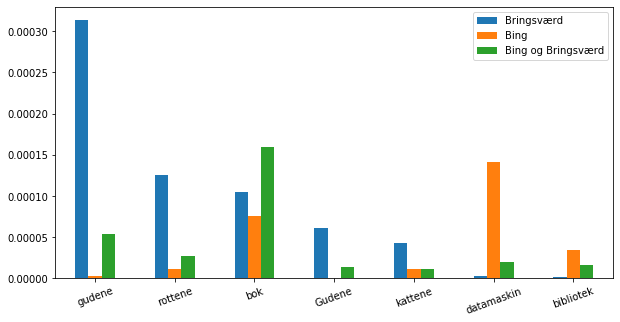

In [357]:
relative_check(trekløver[trekløver.columns[0:3]], ['rottene','kattene', 'bibliotek', 'datamaskin', 'bok', 'Gudene','gudene'], 0).plot(kind='bar', rot=20, figsize=(10,5))

In [358]:
relative_check(trekløver, ['rotter', 'rotte', 'rottene','katter', 'kattene', 'katten','bibliotek', 'biblioteket']).style.background_gradient(cmap='Blues', axis=0)

,Bringsværd,Bing,Bing og Bringsværd,tot
rottene,0.000125294,1.10217e-05,2.77118e-05,2.37618e-06
rotte,8.57783e-05,1.10217e-05,2.37121e-05,2.54473e-06
katten,8.38507e-05,2.20433e-05,5.94232e-05,1.04074e-05
katter,8.28869e-05,2.3268e-05,5.08525e-05,4.69485e-06
rotter,7.22851e-05,1.71448e-05,4.71386e-05,5.11094e-06
kattene,4.24073e-05,1.10217e-05,1.14275e-05,1.58777e-06
biblioteket,2.8914e-06,6.12315e-06,1.82841e-05,1.16713e-05
bibliotek,1.9276e-06,3.42896e-05,1.65699e-05,1.12327e-05


In [316]:
relative_check(trekløver, ['vitenskap', 'bøker','boken','bok','datamaskiner', 'datamaskinen', 'datamaskin']).style.background_gradient(cmap='Blues', axis=1)

,Bringsværd,Bing,Bing og Bringsværd,tot
bok,0.39781,0.117871,0.317018,0.341681
boken,0.335766,0.123574,0.289698,0.252225
bøker,0.215328,0.0855513,0.24132,0.258274
vitenskap,0.0145985,0.0171103,0.0415481,0.0560306
datamaskinen,0.0145985,0.30038,0.0466705,0.0345468
datamaskiner,0.0109489,0.136882,0.0244735,0.0243614
datamaskin,0.0109489,0.218631,0.0392715,0.0328822


In [325]:
relative_check(trekløver, ["troll", "trollet", "trollene", "Gud", "Gudene", "Guder"], 3).fillna(0).style.background_gradient(cmap='Blues', axis=0)

,Bringsværd,Bing,Bing og Bringsværd,tot
Gud,0.454795,0.705882,0.895795,0.963429
troll,0.208219,0.235294,0.0438757,0.015958
trollet,0.0794521,0,0.00457038,0.0096574
Guder,0.0657534,0,0.00822669,0.0064765
Gudene,0.175342,0,0.0447898,0.00447936
trollene,0.0164384,0.0588235,0.00274223,0


In [24]:
styles = "<style>td {text-align:left;width:500px;color:'#aa4488'}</style>"

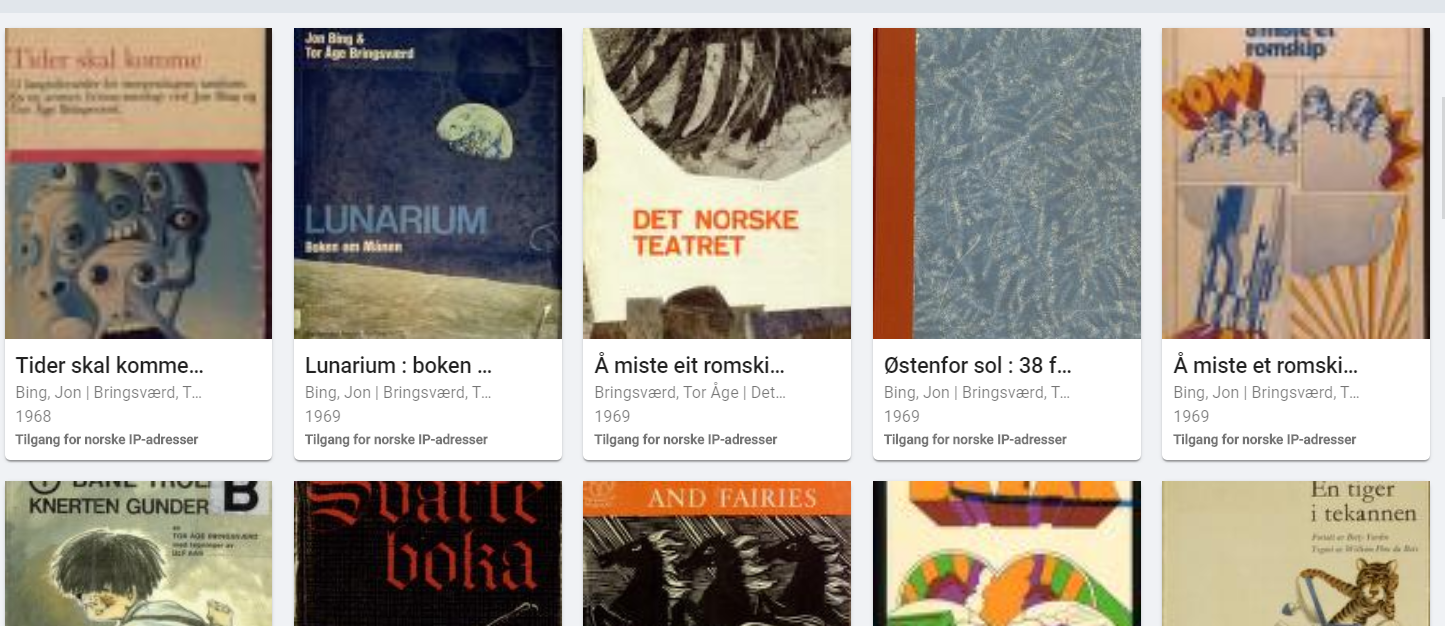

Summerer alle ordene i alle tekstene i korpuset, som skal brukes til sammenligning med bokhylla ellers

In [90]:
bring_agg = nb.aggregate_urns(nb.pure_urn(bring))

In [91]:
bring_df = nb.frame(bring_agg, 'counts')

In [92]:
nb.frame_sort(bring_df).head(5)

,counts
.,191537
",",78791
og,61667
det,43090
er,40908


Henter 50000 ord fra bokhylla

In [93]:
totals = nb.frame(nb.totals(50000), 'tot')

In [94]:
nb.frame_sort(totals).head(5)

,tot
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583


Normaliser og setter dem sammen for et lite display. Her er det høyest frekvens som gjelder, og interessant nok, er det mye punktum og lite komma i Bringsværs produksjon. Kan tyde på barnebøker.

In [95]:
nb.normalize_corpus_dataframe(bring_df)
nb.normalize_corpus_dataframe(totals)

True

In [96]:
nb.frame_sort(pd.concat([bring_df, totals], axis=1, sort=False)).head(10)

,counts,tot
.,0.070612,0.058921
",",0.029047,0.051453
og,0.022734,0.025297
i,0.014516,0.021425
det,0.015886,0.012728
som,0.012307,0.012343
til,0.009907,0.011847
er,0.015081,0.011580
av,0.009138,0.010948
en,0.012490,0.010783


Gjennomfører en sammenligning ved å dividere Bringsværs data på totalen for bokhylla.

In [97]:
compare = lambda x, y = totals['tot']: nb.frame_sort(nb.frame(x/y))

In [98]:
forskjell = compare(bring_df['counts'])

In [99]:
forskjell.head(10)

,0
Hildur,109.205089
Lester,98.358205
Loke,95.969368
Khan,84.788420
ANDERS,75.562408
Klen,74.833879
Moes,71.312510
Nøff,71.003323
Karsten,63.193637
Nigel,55.516343


Grupperer og sorterer resultatet på morfologiske (syntaktiske?) kategorier

In [101]:
mdprint(forskjell)

## Egennavn 
Hildur, Lester, Loke, Khan, ANDERS, Klen, Moes, Nøff, Karsten, Nigel, Ker, Ricardo, Mika, Hood, Saba, Frigg, Odin, Frøy, Petra, Balder, Lilli, Robin, Felix, Rikke, Dragen, Low, Odins, Zeus, Noa, Omar, Wagner, Gudene, Salomo, Munken, Marguerite, Frøya, Marian, Valhall, Illustrert, Gregorius, Troll, Hund, Harris, Thomassen, Ludvik, Stener, Suzanne, Percy, Tyr, GYLDENDAL, Dr, Kaptein, Maar, Fattige, Løp, Blomst, Ch, Buddha, Harold, Sebastian, Hermod, Esther, Hysj, Jeremias, Nemlig, ALLE, Hugo, Rådhuset, Ulven, FanF, Fer, Gerda, Djevelen, Ennå, Jensen, Sigismund, Antonius, Tor, Venter, FAR, Bestemor, Augusta, Kam, Åge, Armand, Altfor, Himalaya, Fienden, Anita, Månen, Salomos, Antagelig, Slår, Jovisst, Mørket, Langsomt, Vale, Holder, SIDE, Lenge, Dronningen, Kreta, Lar, Ler, Grønn, Jammen, Tull, Halen, Natt, Legger, Hel, Lik, OF, Agnete, Lillebror, Egentlig, Themsen, Snakker, Kokken, Bridge, Tivoli, Westminster, Ungen, Katten, Merket, Rull, Reykjavik, Holdt, Wolfgang, Dyrene, Bind, Arnulf, Slipp, Fuglen, Kaj, Veggene, Ness, Kar, Bestefar, Drømmen, Po, Verst, UL, Elvis, Kara, Tarzan, Eventyret, Budapest, Cornelia, Alene, Kjente, Stella, Utrolig, Sindre, Kiev, MANN, Løven, Bygdøy, Alfhild, Og, Little, Føttene, Maja, Genova, Hverken, Tvertimot, Lot, Cooper, ..., Prinsen, Våle, Omslagsdesign, Slik, Agnar, Holde, Cecil, Rolig, Edinburgh, Venn, NÅ, Londons, Oz, Gardens, Sonne, Hundene, Javisst, Sier, Koln, Setter, Vera, Rart, Gaten, Høyt, Hospitalet, Cappelens, Dyret, Wald, Tenker, Dypt, Indias, Imorgen, Gjengitt, Od, Disney, Chelsea, GÅR, Bulletin, Likevel, Trodde, Gatene, J.W, Kjenner, Forsiktig, Mama, Står, Abbey, Plutselig, Nicholas, Trær

## verb
ryster, ape, troll, roper, brøler, klovn, slikker, omfavner, rir, forkledd, rotte, katter, aper, hyler, logg, fakler, klapper, vinker, klatrer, gnir, hvisker, kryper, skotter, klør, klore, bukker, nøler, jubler, sparker, freser, tøys, kledt, mumler, snubler, lener, stuper, synger, virret, vakler, blunker, sverm, torvet, vifter, spruter, snuser, skynder, vridde, vennet, hugger, nikker, svelger, røvet, omfavne, røver, vrir, danser, horses, tennes, slikket, knurret, jager, dreper, gjemmer, velter, drømte, rotter, bukter, løper, lytter, statuer, tramper, våkner, klorte, vrimler, hakker, piper, drypper, avbryter, leker, rull, stønner, trommer, skryter, skyver, gnager, slakter, kysser, hveste, spretter, krøller, ler, griser, blåser, leter, katt, hilder, kniver, pels, fortelles, skvetter, flokker, svømmer, dunker, gråter, snuse, forvandles, dytter, buret, hale, gris, nøste, dempes, dytt, vokter, slikke, sluker, flykter, vintre, nøle, sluke, drømmer, forvandler, speider, tromme, hopper, glitrer, smi, svinet, spir, vinger, mave, redder, gapte, dirrer, herje, sperrer, begir, rister, spytter, smiler, røve, knekker, blør, klappe, stormer, omfavnet, tygger, vandrer, trollet, skjelver, fektet, pisker, flimret, flokket, snur, motsi, sover, flokk, kolliderer, harpe, rusle, orker, sklir, erobrer, raker, piler, forsto, skremmer, kryp, klatre, knuses, våger, kjemper, puster, kvister, streifer, husker, svinger, tilber, flyr, kniper, spådd, slange, slukker, veivet, rykker, sier, skimter, løfter, krype, klipper, drager, gjemme, suser, rusk, lukker, gruer, klø, skumle, drøm, lengter, kolle, drepes, klamrer, sprekker, leke, bretter, fjær, stanser, bråker, hoster, røk, bøyer, griper, forkle, skremt, undrer, svømme, stryker, trenet, smidd, pleier, ormer, hilser, slanger, gidder, hevnet, lytt, bitt, forvandlet, innrømmer, ryker, myter, jakter, balanserer, ruller, viker, brister, gjetter, baller, feier, dyr, smører, dumme, kaster, vafler, skjenker, slemme, rygger, nappet, klødde, hekser, hyle, ynket, temme, kneler, enset, ånde, nikke, biter, smeller, stivner, morer, hullet, frykter, befridde, streker, nynne, teltet, brøle, triller, tørker, tusj, pinner, skyer, forhekset, jaktet, stinket, klynket, kanter, råtne, rukket, gnage, hover, løpe, mykt, skraper, tenker, hugget, krøpet
## unknown
jeF, seF, gudenes, eF, kaa, meF, hij, zijn, hidden, deF, flyvende, fiction, giri, gyldne, übevegelige, supposed, mumling, bodet, hverandre., høvt, hilset, li2n, farver, hsrer, husveggen, piu, luftens, dyrets, papa, someone, sono, de., dangerous, boat, istykker, trofasthet, dronningens, kjempestore, heeft, ikkc, trance
## subst
labbene, munken, tigeren, elefanten, stenene, gudene, stener, rottene, elefant, grimaser, uhyret, labyrinten, ødemarken, ulver, kjempen, kattene, ulvene, dragen, labben, elefanter, maven, grisen, demoner, skapninger, snuten, morfar, hammeren, halen, frosk, demon, jungelen, robot, klåtrer, eventyrene, synene, legender, tyven, løve, prins, løven, sheriffen, gudinnen, tiger, skapning, heltene, stenen, grotte, krigere, bjørner, maskinene, pelsen, monster, spydet, labyrint, eventyr, jegerne, grenen, ørnen, guder, dukken, scenen, løver, jungel, snute, hodene, oksen, jammen, bensinstasjonen, kjortel, tronen, fredløs, ulv, sletten, hunder, sten, klørne, fakkel, okse, kjerra, eventyret, helten, marken, halvsirkel, puslespill, arken, ropene, hvalen, dyrene, skapningen, barnebøker, musene, verdener, navlen, hornene, reiret, grisene, krukken, svane, djevler, hjørner, øksen, majestet, innbinding, ugle, fløyten, bål, stamfar, tretoppene, høvding, guden, horn, grålysningen, sverdet, dronningen, bykset, kameler, hundene, kamel, lise, tåke, kjepp, ridderen, helter, krigerne, blekksprut, korstog, gåter, drømmen, rullen, hornet, vesener, teltene, røverne, stammen, nebbet, soppen, ørene, esel, murene, prinsessen, katten, dyret, fjærene, speidere, omveier, kråke, løpetid, vingene, torden, allé, slottet, falk, hoder, spyd, grådighet, eplene, mytene, vaktene, planeten, vandringen, bikkja, krampe, virvar, bokhandel, røvere, gapet, svinekjøtt, grenene, ondskapen, hetter, fugler, sverd, puben, okser, slangen, røkelse, skikkelse, knuten, tyv, århundrene, regnvær, djevel, hund, hammer, måne, ugler, skuespillerne, sprekken, flokken, bulter, musen, månen, gylden, harer, tegneserier, manuskriptet, skyene, spot, stjernene, kropper, brønn, flaggermus, pus, hjelm, kroppene, statue, ørn, grotten, rytteren, biene, pub, kjeften, versjonen, pilen, skikkelser, prinsesse, trekkspill, ødeleggelsen, haven, vogner, kunster, opprinnelsen, speilbilde, tungen, korridorer, lemen, rustning, sommerfugler
## adj
vrient, digert, morsomste, merkeligste, stripete, mektigere, digre, eventyrlige, diger, dinglende, mumlende, mektigste, grådige, lubne, lodne, kåt, dovent, gærne, trassig, skurrende, pipende, hylende, fjollete, avvergende, innsmigrende, usynlig, vandrende, skotske, bistert, barbent, umulige, sleipe, lumske, merkelige, magiske, skjeggete, sinte, tamme, råtten, ondskapsfulle, ivrigste, trofaste, livløs, fillete, yrende, veldige, underjordisk, farligste, farligere, sultne
## det
selveste, tredve
## prep
midtveis, bakenfor


Finner vekstdiagram

In [102]:
ruff = nb.frame(nb.get_freq(ruffen, top=0, cutoff=0))

In [103]:
nb.normalize_corpus_dataframe(ruff)

True

In [104]:
ruff.head()

,0
.,0.058090
",",0.026636
»,0.022953
/,0.022103
«,0.021536


In [42]:
ruff_forskjell = compare(ruff[0])

In [43]:
ruff_forskjell

,0
Ludvik,1200.627703
Tusen,780.302084
tred,728.248021
svømme,573.064799
tredve,481.338807
Bestemor,477.694583
spruter,423.456171
søren,416.061136
krabber,322.799017
blekksprut,280.670530


In [44]:
mdprint(ruff_forskjell, cutoff=4)

## Egennavn 
Ludvik, Tusen, Bestemor, Dobbelt, Ombord, Stiklestad, Bf, SMS, Jh, HE, IC, Fabrikker, Dreyer, BI, Ku, DD, C2, Stormen, Ib, BY, PO, Theodor, Liker, PS, Sats, Cf, Hl, Fortsatt, Stakkars, ¥, Jonathan, NI, Slottet, SA, 525, LI, Egentlig, Søndag, Papir, Kapteinen, Br, Oi, Madsen, Sv, Au, Ci, Hi, MM, Times, SE, Rudolf, Skrift, Rana, Dens, LL, JJ, Ol, Selvfølgelig, Havet, Små, \, Fortell, NB, Bl, Langt, Li, OT, SS, Plutselig, Pl, Trygve, ■, Hm, Si, Hold, Cl, •, W, |, Al, ISBN, #, York, ®, Fredrik, $, ™, Takk, Først, @, Uten, 1972, Barn, 1974, /, Carl, Z, *, ^, 1977, &, New, Stavanger, Amerika, 1981, ', AV, Hadde, Hele, Ta, Hver, 20., Derfor, 111, Q, 000, <, Alle, Nå, Og, £, V, », }, R, Siden, >, «, M

## unknown
tred, strandkanten, oy, søvne, tjuefem, lll, ooo, bt, iS, fc, bunns, lill, ov, tf, herfrå, ft, rø, de., é, pkt., min., im, oo, aa
## verb
svømme, spruter, krabber, grunna, ynket, flaut, svømmer, måpte, stupe, svømte, besvimte, forkjølet, sprutet, vasset, brøler, lynte, kapp, tordnet, rynke, trente, bevæpnet, nys, glattet, overraske, jamret, slep, vrak, unnskyld, tygge, overfalt, stilnet, bade, vippet, ål, fli, gråter, erter, trykt, fæl, freste, ferde, telle, oppkalt, ertet, drage, stupte, røk, stø, rukket, troll, sjenert, gjemmer, synke, eske, fortapt, lærte, dukke, torde, blåste, blåse, rødmet, bukket, damp, hylte, viftet, pleier, blåser, redde, våkner, tau, ty, oppdage, trene, vinger, roper, bølger, slaget, hete, hvilte, li, forundret, skremt, rute, oppdager, sparket, tø, ul, kle, øy, binde, krøp, forsøkt, leker, vent, puste, storm, pustet, hoppe, plukket, skam, ly, skjønte, forsvunnet, sove, dukker, reddet, sky, forbauset, lettet, kanter, heter, ropte, løper, ild, slekt, vannet, skjøt, utgitt, glemte, hørtes, tett, tall, fly, trodd, løp, natt, syntes, kart, skjønner, sang, øye, vakt, sukket, oppgitt, dekket, trykk, passet, ment, bor, minne, slett, vokser, helse, stoppet, lære, hjelpe, drept, vende, nikket, rød, tekst, il, holdt, vann, sprang, spilte, brukte, kurs, forsvant, varm, nei, vær, hang, lot, huske, løs, redd, fart, spille, stakk, spørre, åtte, navn, laget, visst, sa, oppdaget, ende, fort, fint, holder, trengte, kaller, liker, venn, klarte, hender, fare, mørke, glede, fast, sier, åpne
## det
tredve, ni, ingen
## interj
søren
## subst
blekksprut, uvær, orkan, rakett, maven, eksemplarer, orkesteret, rusten, opplag, innbinding, stenene, raketter, bølgene, tirsdag, negler, uværet, stener, dragen, halen, slottet, knute, onkel, passasjerene, øya, fredag, måndag, onsdag, torsdag, foto, allting, sjokolade, etasjer, ferie, tåke, kinesisk, formiddag, vennene, skyene, båtene, horisonten, slott, maken, stormen, havnen, avskjed, mo, nesen, sirkel, haken, lørdag, bestemor, tjenesten, armene, ve, uhyre, dyrene, moro, w, vinduene, båten, q, sjøen, mil, menneskene, etasje, båt, y, sort, havet, v, blomster, pannen, pusten, natten, au, o, ø, hodet, halsen, sommeren, hår, boken, sengen, himmelen, r, glad, begynnelsen, vinduet, l, j, fe
## adj
svømmende, nyfødt, ekle, flinkere, irriterende, klokt, våt, mystisk, usynlig, ill, uhyggelig, fryktelig, fjernt, høflig, farlig, morsomt, deilig, forsiktig, synlig, stakkars, trist, verdt, alvorlig, vill, pent, ordentlig, antagelig, verste, sittende, syk, fin, enige, kaldt, vondt, dypt, ok, umulig, rolig, rundt, hardt
## prep
sydover
## fork
kl, fr, fl, ff
## adv
naturligvis


In [45]:
ruffen

2014071706049

In [46]:
ruff_graf = nb.make_network_graph(ruffen, list(ruff_forskjell.index)[:100])

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


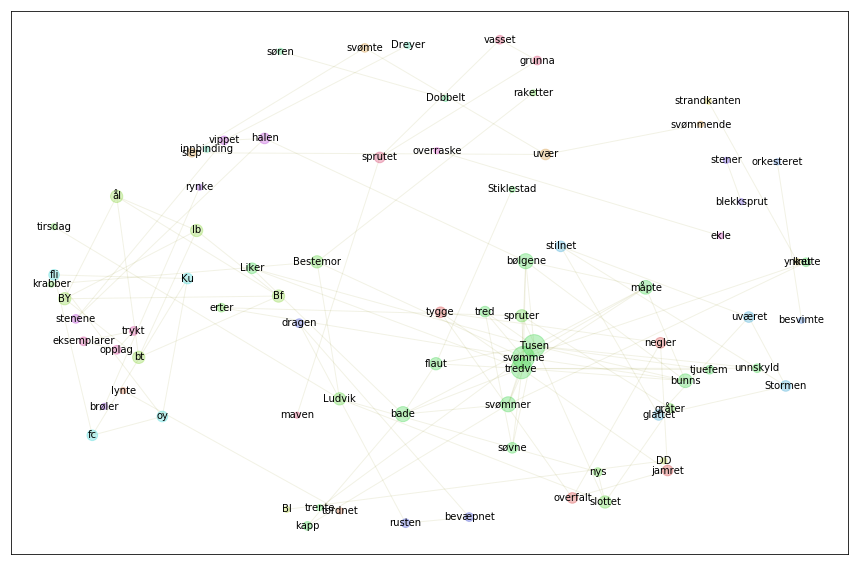

In [47]:
gnl.show_graph(ruff_graf, spread=0.8)

In [48]:
gnl.show_communities(ruff_graf)

BI-DD :  BI, DD

bt-BY :  bt, BY, ål, Bf, Ib

spruter-slottet :  spruter, slottet, Ludvik, Bestemor, gråter, erter, nys, tirsdag, raketter, krabber

Tusen-svømme :  Tusen, svømme, tredve, bade, bølgene, svømmer, bunns, måpte, flaut, tred, Liker, søvne, tjuefem, unnskyld, knute, kapp, Stiklestad, trente

Dobbelt-søren :  Dobbelt, søren

Dreyer-innbinding :  Dreyer, innbinding

oy-Ku :  oy, Ku, fc, fli

uværet-glattet :  uværet, glattet, Stormen, stilnet

orkesteret-besvimte :  orkesteret, besvimte

bevæpnet-rusten :  bevæpnet, rusten, dragen

stener-blekksprut :  stener, blekksprut

brøler-rynke :  brøler, rynke

halen-stenene :  halen, stenene, vippet

overraske-ekle :  overraske, ekle

trykt-opplag :  trykt, opplag, eksemplarer

sprutet-vasset :  sprutet, vasset, grunna, maven

negler-jamret :  negler, jamret, overfalt, tygge

lynte-tordnet :  lynte, tordnet

uvær-slep :  uvær, slep, svømte, svømmende

strandkanten-ynket :  strandkanten, ynket



In [49]:
ruff_dict = gnl.community_dict(ruff_graf)

In [50]:
ruff_dict

{'BI-DD': ['BI', 'DD'],
 'bt-BY': ['bt', 'BY', 'ål', 'Bf', 'Ib'],
 'spruter-slottet': ['spruter',
  'slottet',
  'Ludvik',
  'Bestemor',
  'gråter',
  'erter',
  'nys',
  'tirsdag',
  'raketter',
  'krabber'],
 'Tusen-svømme': ['Tusen',
  'svømme',
  'tredve',
  'bade',
  'bølgene',
  'svømmer',
  'bunns',
  'måpte',
  'flaut',
  'tred',
  'Liker',
  'søvne',
  'tjuefem',
  'unnskyld',
  'knute',
  'kapp',
  'Stiklestad',
  'trente'],
 'Dobbelt-søren': ['Dobbelt', 'søren'],
 'Dreyer-innbinding': ['Dreyer', 'innbinding'],
 'oy-Ku': ['oy', 'Ku', 'fc', 'fli'],
 'uværet-glattet': ['uværet', 'glattet', 'Stormen', 'stilnet'],
 'orkesteret-besvimte': ['orkesteret', 'besvimte'],
 'bevæpnet-rusten': ['bevæpnet', 'rusten', 'dragen'],
 'stener-blekksprut': ['stener', 'blekksprut'],
 'brøler-rynke': ['brøler', 'rynke'],
 'halen-stenene': ['halen', 'stenene', 'vippet'],
 'overraske-ekle': ['overraske', 'ekle'],
 'trykt-opplag': ['trykt', 'opplag', 'eksemplarer'],
 'sprutet-vasset': ['sprutet', 'vas

In [51]:
nb.plot_book_wordbags(ruffen, subdict(ruff_dict,[ "Bestemor-Ludvik", "Stormen-stilnet", "overfalt-negler", "sprutet-vasset", 'tordnet-lynte']), window=500, pr=10).plot(figsize=(10,5), lw=3, alpha=.8)

NameError: name 'subdict' is not defined

In [ ]:
bring[bring.title == 'Vår verden er dugg']

In [ ]:
dugg = nb.get_freq(2015091706060, top=0, cutoff=0)

In [ ]:
dugg = nb.frame(dugg)
nb.normalize_corpus_dataframe(dugg)
dugg.head(10)

In [ ]:
dugg_forskjell = compare(dugg[0])

In [ ]:
dugg_forskjell

In [ ]:
mdprint(dugg_forskjell, cutoff=10)

In [ ]:
nb.metadata(2015091706060)

In [ ]:
blind = nb.get_freq(blindpassasjer, top=0, cutoff=0)

In [ ]:
blind_df = nb.frame(blind)
nb.normalize_corpus_dataframe(blind_df)
blind_df.head(10)

In [ ]:
blind_forskjell = compare(blind_df[0])

In [ ]:
blind_forskjell

In [ ]:
mdprint(blind_forskjell, cutoff=10)

In [ ]:
nb.metadata(blindpassasjer)

In [ ]:
dugg_bok = 2013020609508

In [ ]:
nb.plot_book_wordbags(dugg_bok, 
                      {'dyr': "tigeren kattene katter rottene dragen labbene".split(), 
                       'fabeldyr':"dragen gudinnen skapning skapningen".split(),
                       #'banditt':"røvere drapsmann".split(),
                       #'sted': "ødemarken, landsbyene, torget, bakgården, verdener, skogholt, gårdsplassen".split(", ")
                      }).plot(figsize=(12,5), lw=4, alpha=0.7);

In [ ]:
dugg_graf = nb.make_network_graph(dugg_bok, list(dugg_forskjell.index)[:200])

In [ ]:
gnl.show_graph(dugg_graf, spread=0.6, fontsize=12);

In [ ]:
gnl.show_communities(dugg_graf)

In [ ]:
dugg_communities = gnl.community_dict(dugg_graf)

In [ ]:
def subdict(d, keys):
    return {key:d[key] for key in keys if key in d}

In [ ]:
nb.plot_book_wordbags(dugg_bok, 
                      dugg_communities,
                      ).plot(figsize=(15,8), lw=4, alpha=0.8);

In [ ]:
nb.plot_book_wordbags(dugg_bok, 
                      subdict(dugg_communities,["spydet-vaktene", "trøst-eventyret", "maskiner-metall", "forsto-trøstet"]) ,
              ).plot(figsize=(15,8), lw=4, alpha=0.8);

In [ ]:
nb.plot_book_wordbags(blindpassasjer, 
                      {'dyr': "tigeren kattene katter rottene dragen labbene".split(), 
                       'fabeldyr':"dragen gudinnen skapning skapningen".split(),
                       #'banditt':"røvere drapsmann".split(),
                       #'sted': "ødemarken, landsbyene, torget, bakgården, verdener, skogholt, gårdsplassen".split(", ")
                      }).plot(figsize=(12,5), lw=4, alpha=0.7);

In [ ]:
blind_graf = nb.make_network_graph(blindpassasjer, list(blind_forskjell.index)[:300])

In [ ]:
gnl.show_graph(blind_graf, spread=0.4, fontsize=10);

In [ ]:
gnl.show_communities(blind_graf)

In [ ]:
nb.nb_ngram('romskipet, romskip').rolling(window=4).mean().plot(figsize=(10,5))

In [ ]:
nb.nb_ngram('ryster, roper, rotte, klovn, omfavner, katter, slikker, brøler, hyler, troll, forkledd').rolling(window=4).mean().plot(figsize=(10,5))

In [ ]:
skip = nb.book_corpus(words=['romskip', 'romskipet'], ddk="839%", limit=4000)

In [ ]:
skip.groupby('year').count()['urn'].plot(figsize=(10,5), lw=3)

In [ ]:
gnl.show_cliques(blind_graf)

In [ ]:
blind_communities = gnl.community_dict(blind_graf)

In [ ]:
def subdict(d, keys):
    return {key:d[key] for key in keys if key in d}

In [ ]:
nb.urn_concordance(word='JASON', urns=[blindpassasjer], before=10, after=10)

In [ ]:
nb.plot_book_wordbags(blindpassasjer, 
                      blind_communities, window=2000, pr=100,
                      ).plot(figsize=(15,8), lw=4, alpha=0.8);

In [ ]:
nb.plot_book_wordbags(blindpassasjer, 
                      subdict(blind_communities,[
                          "Faen-kontorist",
                          "skipet-besetningen", 
                          "bekymrer-slep", 
                          "planeten-røper", 
                          "Jason-lugaren"
                      ]) ,
             window=1000 ).plot(figsize=(15,8), lw=4, alpha=0.8);

In [ ]:
fabelkorpus0 = nb.book_corpus(subject='fabler', limit=200, trans='')

In [ ]:
fabelkorpus1 = nb.book_corpus(subject='Fabler', limit=200, trans='')

In [ ]:
fabelkorpus1

In [ ]:
fabelkorpus

In [ ]:
blind_df.loc[['JASON', 'Jason']]

In [ ]:
'JASON'.upper()

In [ ]:
'JASPON2'.isalpha()

In [ ]:
caps = [x for x in blind_df.index if x.upper() == x and x.isalpha()]

In [ ]:
nb.urn_concordance(word=caps, urns=nb.pure_urn(blindpassasjer))

In [ ]:
nb.urn_coll('JASON')

In [ ]:
nb.book_corpus(subject='abortpolitikk')

In [382]:
nb.best_book_urn('datamaskin', ddk="839%", trans='')

[[2008081400075,
  'Lillo, Gerd Eva',
  'Sjakk matt på en sommer, eller: Caissa snører nettet',
  1997],
 [2013040206024, 'Bing, Jon', 'Hvadata?', 1986],
 [2014052308107, 'Mehren, Stein', 'Utvalgte dikt', 2003],
 [2008082001017, 'Mehren, Stein', 'Utvalgte dikt', 1999],
 [2013012907234, 'Bing, Jon', 'Dobbeltgjengere', 1984],
 [2007060501007, 'Bing, Jon', 'Azur', 1975],
 [2016020808107, 'Bing, Jon', 'Azur', 1978],
 [2013050606125, 'Bing, Jon', 'Kvartsbrikker', 1982],
 [2012062905019,
  'Eikegard, Sven',
  'Dissonanser, eller Stygge unoter i solsystemet &amp; omegn',
  2011],
 [2011061408047, '', 'Audiatur', 2007],
 [2013102106041, 'Faldbakken, Knut', 'Tyvene', 2008],
 [2013031905071, 'Dahl, Kjell Ola', 'Svart engel', 2008],
 [2012121705033, 'Faldbakken, Knut', 'Tyvene', 2007],
 [2012112308031, 'Faldbakken, Knut', 'Tyvene ; Senskade', 2012],
 [2012110206132, 'Dahl, Kjell Ola', 'Svart engel', 2007],
 [2014051405009, 'Bye, Harald', 'Blindpassasjeren', 2011],
 [2012112206024, 'Bing, Jon', 'Z

In [388]:
nb.dewey("839")

{'1': ['8', 'Litteratur'],
 '2': ['83', 'Tysk og beslektede litteraturer'],
 '3': ['839', 'Andre germanske språks litteraturer']}